This notebook creates webnucleo reaction XML data from user-supplied input.  First install and import the necessary packages.

In [1]:
import sys
!{sys.executable} -m pip install --quiet wnutils
import wnutils.xml as wx
import matplotlib.pyplot as plt
import numpy as np

Here we create a routine to compute any user-defined rate function(s).  The simple example here is a placeholder.

In [2]:
def my_func(t9):
    return t9 + t9**2

Now create a dictionary of the user-defined rate functions.

In [3]:
my_user_rates = {'user_rate': my_func}

Begin by reading in the XML.  You may read the data from a local directory or over the web from the appropriate URL (see the commented example).  If you are running the notebook on Google Colab, you can upload the data to the work directory by clicking on the directory tab to the left and then clicking the upload symbol.  On Colabl, you may also read the file from Google Drive (click the Drive icon and follow the instructions).

In [4]:
xml = wx.Xml("my_net.xml")
#xml= wx.Xml("https://example.com/my_net.xml")

Now select the reactions to plot by XPath.  The XPath expression should select a number of individual reactions.

In [5]:
reactions = xml.get_reaction_data("[reactant = 'si28' and product = 'gamma']")

Now select the temperatures at which to plot the reaction rates.

In [6]:
t9s = np.logspace(-2, 1, 100)

Compute the rates and store them in a dictionary.

In [7]:
y = {}

for r in reactions:
    yy = []
    for t9 in t9s:
        yy.append(reactions[r].compute_rate(t9, user_funcs = my_user_rates)) 
    y[r] = yy

Plot the reaction rates.  Adjust the matplotlib commands as desired.

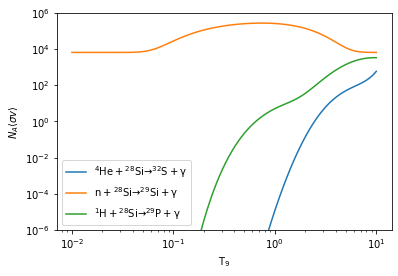

In [8]:
for r in reactions:
    plt.plot(t9s, y[reactions[r].get_string()], label=reactions[r].get_latex_string())

plt.xscale('log')
plt.yscale('log')

plt.ylim([1.e-6, 1.e6])

plt.xlabel('${\\rm T_9}$')
plt.ylabel('$N_A \\langle \\sigma v \\rangle$')

plt.legend()